In [18]:
# 1. Import Libraries
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 2. Load Data Safely with Bad Line Handling
try:
    df = pd.read_csv(r"C:\Users\HP\Downloads\data_science.csv", encoding='utf-8', on_bad_lines='skip')
    print("✓ File loaded successfully.")
except Exception as e:
    print("✗ Error loading CSV:", e)



C:\Users\HP\AppData\Local\Temp\ipykernel_14660\2786875684.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\HP\Downloads\data_science.csv", encoding='utf-8', on_bad_lines='skip')


✓ File loaded successfully.


In [3]:
# 3. Identify and Rename Tweet Column
print("\nColumns in your dataset:")
print(list(df.columns))

# Strip spaces and lowercase all columns
df.columns = df.columns.str.strip().str.lower()

# Try to detect the tweet column based on common names
tweet_col = None
for col in df.columns:
    if any(key in col for key in ['tweet', 'text', 'content']):
        tweet_col = col
        break

if tweet_col:
    df.rename(columns={tweet_col: "tweet"}, inplace=True)
    print(f"✓ Found tweet-like column: '{tweet_col}' renamed to 'tweet'")
else:
    raise KeyError("✗ Could not find a tweet or text column in the dataset.")




Columns in your dataset:
['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
✓ Found tweet-like column: 'tweet' renamed to 'tweet'


In [4]:
# 4. Drop Missing or Empty Tweets
df.dropna(subset=['tweet'], inplace=True)
df = df[df['tweet'].astype(str).str.strip() != '']
print("✓ Cleaned shape:", df.shape)



✓ Cleaned shape: (241386, 36)


In [5]:
# 5. Clean Tweets
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)     # Remove mentions
    text = re.sub(r"#\w+", "", text)     # Remove hashtags
    text = re.sub(r"[^A-Za-z0-9\s]+", "", text)  # Remove non-alphanumeric characters
    return text.strip().lower()

df['cleaned_tweet'] = df['tweet'].astype(str).apply(clean_tweet)



In [6]:
# 6. Sentiment Analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)



In [21]:
# 7. Show Results
print("\n✓ Sentiment Summary:")
print(df['sentiment'].value_counts())

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)




✓ Sentiment Summary:
sentiment
Positive    110234
Neutral     109731
Negative     21421
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14660\2702704290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


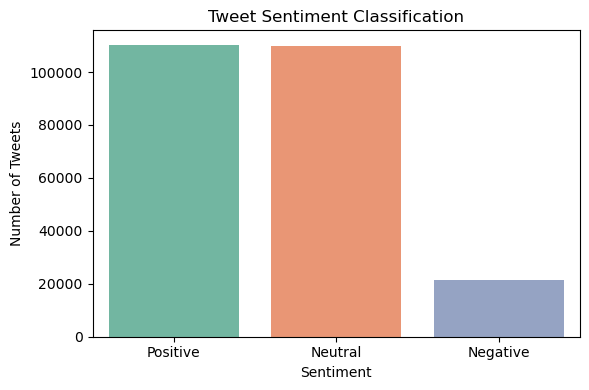

In [25]:
# --- Graph 1: Sentiment Count Plot ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Tweet Sentiment Classification")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()





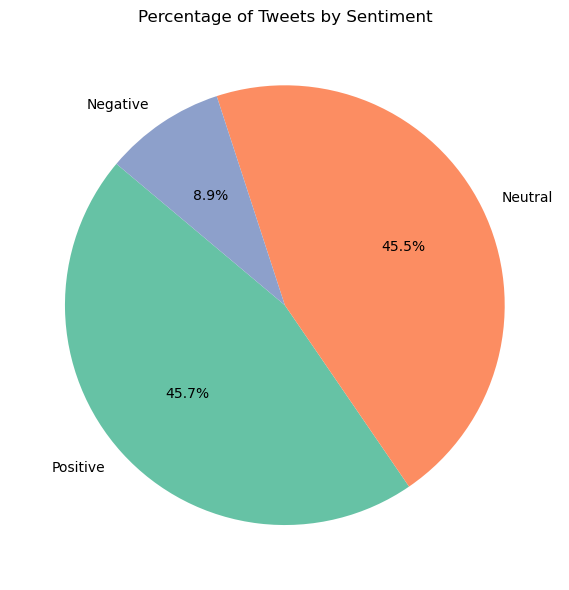

In [27]:
# --- Graph 2: Sentiment Percentage Pie Chart (Cleaned Tweets) ---
sentiment_counts = df['sentiment'].value_counts()
sentiment_percent = (sentiment_counts / sentiment_counts.sum()) * 100
plt.figure(figsize=(6, 6))
plt.pie(sentiment_percent, labels=sentiment_percent.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title("Percentage of Tweets by Sentiment")
plt.tight_layout()
plt.show()